<a href="https://colab.research.google.com/github/Legendary-Nerd/ML-Project-Iris-Classification/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extrovert vs. Introvert Behavior Data

### Data Collection

In [ ]:
# Collect

import kagglehub

# Download latest version
path = kagglehub.dataset_download("rakeshkapilavai/extrovert-vs-introvert-behavior-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/extrovert-vs-introvert-behavior-data


In [ ]:
import os
os.listdir(path)

['personality_datasert.csv', 'personality_dataset.csv']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
import joblib

In [ ]:
df = pd.read_csv(path + "/personality_datasert.csv")
df.head(5)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [ ]:
df.shape

(2900, 8)

## Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Stage_fear"] = le.fit_transform(df["Stage_fear"])
df["Drained_after_socializing"] = le.fit_transform(df["Drained_after_socializing"])
df["Personality"] = le.fit_transform(df["Personality"])

df.head(5)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


Extrovert = 0 <br>
Introvert = 1

In [ ]:
df.describe()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,0.486207,3.963354,3.000000,0.485172,6.268863,3.564727,0.485862
std,3.441180,0.499896,2.872608,2.221597,0.499866,4.232340,2.893587,0.499886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,4.000000,0.000000,3.963354,3.000000,0.000000,5.000000,3.000000,0.000000
75%,7.000000,1.000000,6.000000,5.000000,1.000000,10.000000,6.000000,1.000000
max,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# X_train,X_test

In [ ]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [ ]:
df_class = df[['Time_spent_Alone', 'Social_event_attendance',
       'Going_outside',  'Friends_circle_size',
       'Post_frequency', 'Personality']]

Ploting

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

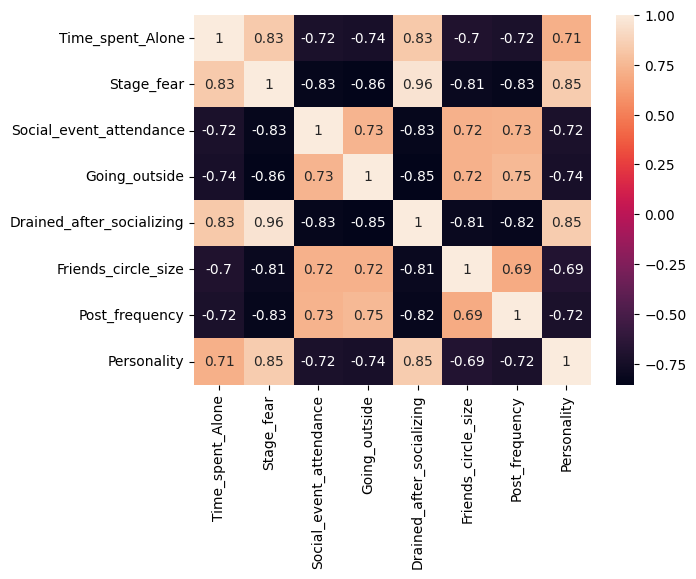

In [ ]:
ax = sns.heatmap(df.corr(), annot=True)

In [ ]:
df.corr()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
Time_spent_Alone,1.000000,0.834469,-0.718139,-0.735247,0.832117,-0.701665,-0.718072,0.712468
Stage_fear,0.834469,1.000000,-0.831737,-0.855403,0.956518,-0.810046,-0.826483,0.847467
Social_event_attendance,-0.718139,-0.831737,1.000000,0.731941,-0.830611,0.718518,0.727732,-0.721520
Going_outside,-0.735247,-0.855403,0.731941,1.000000,-0.852969,0.718327,0.754758,-0.739251
Drained_after_socializing,0.832117,0.956518,-0.830611,-0.852969,1.000000,-0.805234,-0.823028,0.845388
Friends_circle_size,-0.701665,-0.810046,0.718518,0.718327,-0.805234,1.000000,0.690381,-0.687203
Post_frequency,-0.718072,-0.826483,0.727732,0.754758,-0.823028,0.690381,1.000000,-0.721062
Personality,0.712468,0.847467,-0.721520,-0.739251,0.845388,-0.687203,-0.721062,1.000000


## SVM

In [ ]:
from sklearn.svm import SVC


svm = SVC()
svm.fit(X_train, y_train)


SVC()

In [ ]:

y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9293103448275862
[[278  24]
 [ 17 261]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       302
           1       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



### Create pipeline

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC())
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [ ]:
joblib.dump(pipeline, 'svm_pipeline.pkl')

['svm_pipeline.pkl']

## Linear Regression

In [ ]:
X = df.iloc[:,[0,1,4]]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)



LinearRegression()

In [ ]:
lr.score(X_test, y_test)

0.7216769227127459

### Pipeline Linear Regression

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('', LinearRegression())
])
pipeline.fit(X_train, y_train)

joblib.dump(pipeline,'linear_pipeline.pkl')

['linear_pipeline.pkl']

## Multi Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

clf=MLPClassifier(solver='adam',alpha=1e-5,activation='relu',hidden_layer_sizes=(20,10,5),random_state=42)
clf.fit(X_train,y_train)




MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 10, 5), random_state=42)

In [ ]:
y_pred=clf.predict(X_test)
print(y_pred)


print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0
 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0
 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0
 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0
 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1
 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0
 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1
 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1
 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1
 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1
 1 0 1 0 0 1 0 0 1 0 1 0 

### Pipeline

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', MLPClassifier(solver='adam',alpha=1e-5,activation='relu',hidden_layer_sizes=(20,10,5),random_state=42))
])

pipeline.fit(X_train, y_train)

joblib.dump(pipeline,'mlp_pipeline.pkl')

['mlp_pipeline.pkl']